In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn import preprocessing
df=pd.read_csv("./data/profit_predication_data.csv.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


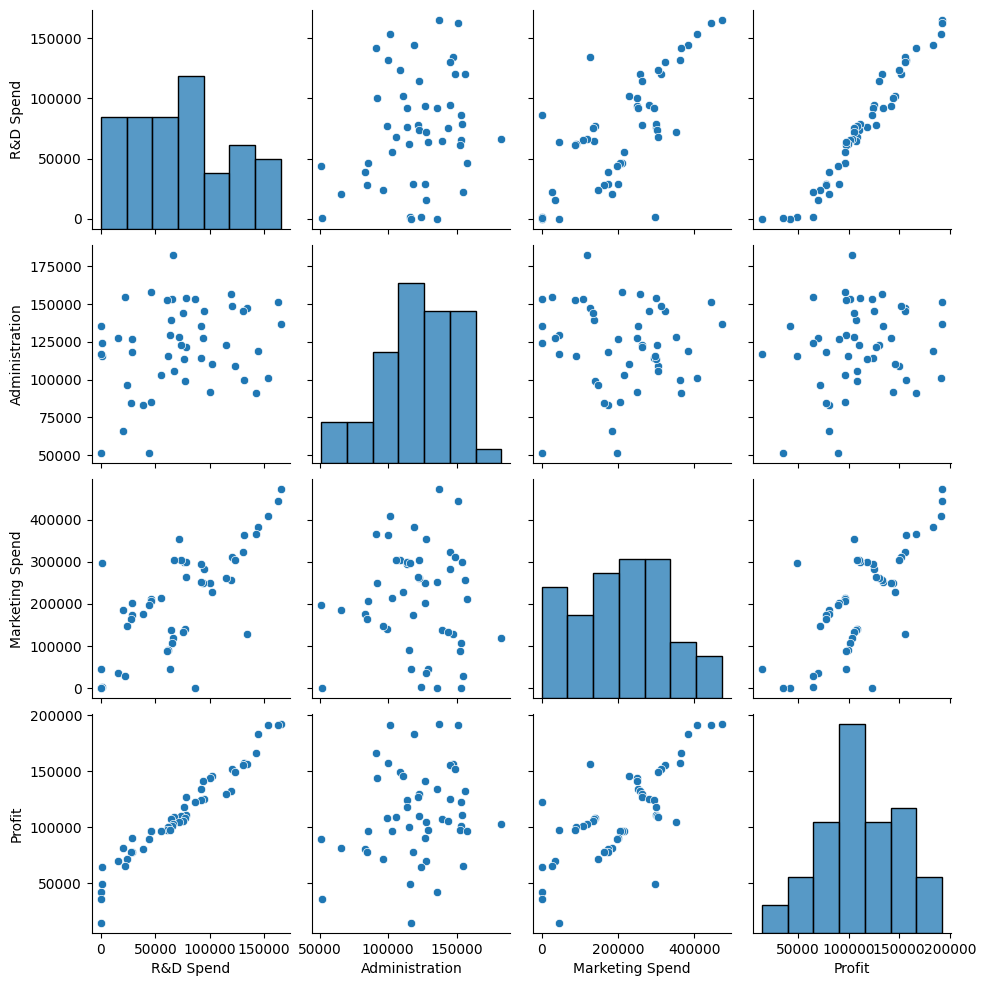

In [16]:
numerical_cols=df.select_dtypes(include=['int','float'])
sns.pairplot(numerical_cols)

In [49]:
df.groupby('State')['Marketing Spend'].agg(Total_Spend=('sum'))

,Total_Spend
State,
California,3103195.80
Florida,3957176.82
New York,3490882.27


In [55]:
df.groupby('State')['Profit'].agg(Total_Spend=('sum'))

,Total_Spend
State,
California,1766387.98
Florida,1900384.39
New York,1933859.59


In [35]:
df.loc[df.isnull().any(axis=1)]

,R&D Spend,Administration,Marketing Spend,State,Profit,state_code


In [56]:
df.loc[df.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit,state_code


<Axes: xlabel='State', ylabel='Profit'>

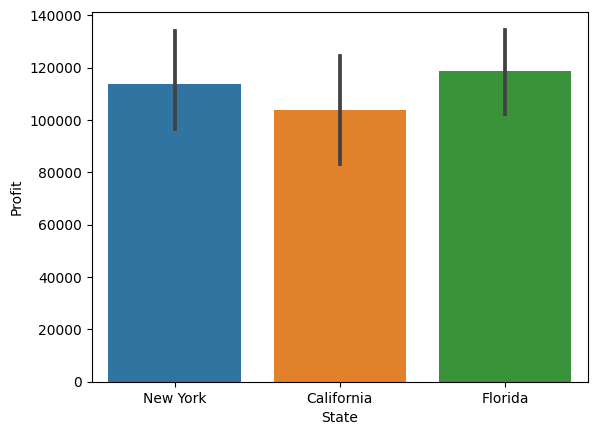

In [38]:
sns.barplot(data=df,x='State',y='Profit')

Text(0.5, 1.0, 'R&D Spend/ Marketing spend')

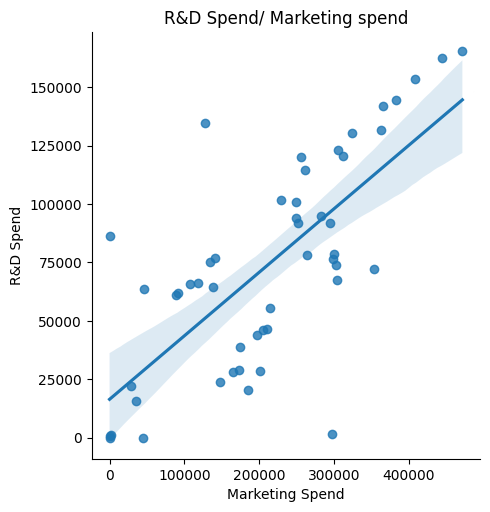

In [58]:
sns.lmplot(data=numerical_cols,x='Marketing Spend',y='R&D Spend')
plt.title('R&D Spend/ Marketing spend')

<Axes: >

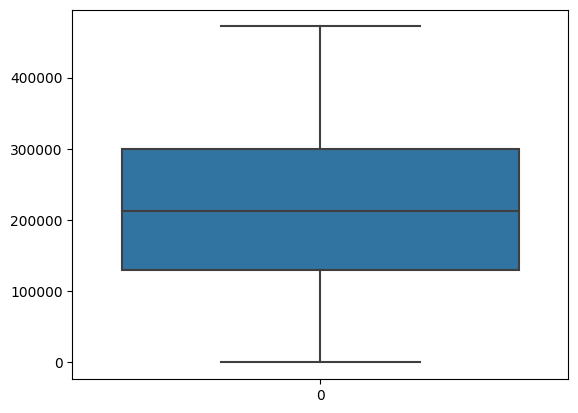

In [37]:
sns.boxplot(df['Marketing Spend'])

#### Inspecting the categorical data

In [17]:
df.State.unique()
state_code={'New York':0, 'California':1, 'Florida':2}
df['state_code']=df.State.map(state_code)

<Axes: xlabel='Profit', ylabel='Density'>

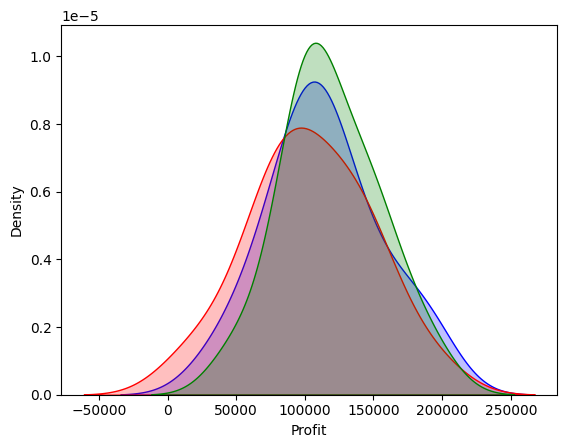

In [18]:
data1=df[df.state_code==0]
data2=df[df.state_code==1]
data3=df[df.state_code==2]
sns.kdeplot(data1['Profit'],fill=True,color='blue')
sns.kdeplot(data2['Profit'],fill=True,color='red')
sns.kdeplot(data3['Profit'],fill=True,color='green')

In [19]:
numerical_cols=df.select_dtypes(include=['int','float'])

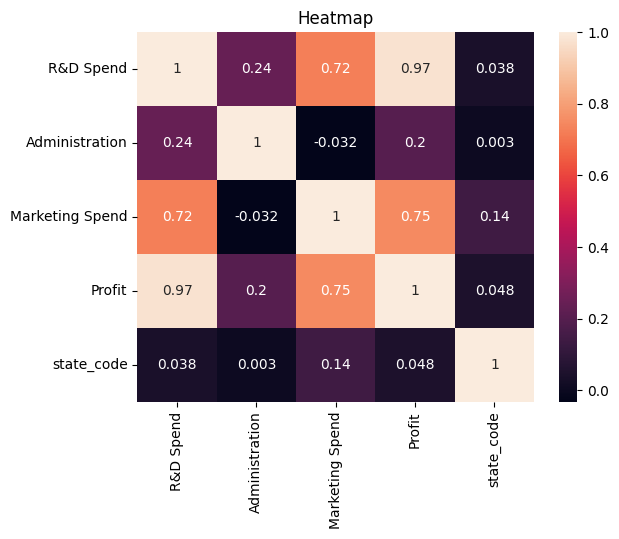

In [60]:
cor=numerical_cols.corr()
sns.heatmap(cor,annot=True)
plt.title('Heatmap');

#### so the profit seems to be highly correlated with r&d spend and marketing spend

#### Creating the dependent and indepedent variables

In [62]:
X=numerical_cols[['R&D Spend', 'Marketing Spend']]
y=numerical_cols.Profit
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)
model=LinearRegression()
model.fit(X_train,y_train);
predicted_profit=model.predict(X_test)

In [63]:
r2_score(predicted_profit,y_test)

0.9564933847256468